# Métodos Numéricos 2024

## Guía 3: 2024-04-23 - Interpolación y aproximación polinomial

In [1]:
using Plots
using LaTeXStrings

### Problema 1

1. Usando los puntos interpolantes $x_0 = 0$, $x_1=0.6$ y $x_2=0.9$, construya analíticamente los polinomios interpolantes de Lagrange de grado 1 y 2 que aproximen las funciones
  
    **a.** $f(x) = \ln (x+1)$
    
    **b.** $g(x) = \sqrt{x+1}$ 
    
    en $x=0.45$.

2. Encuentre los errores absolutos y relativos correspondientes.

3. En el rango dado $[x_0,x_2]$, grafique ambas funciones, sus polinomios interpolantes y correspondientes aproximaciones de Taylor de grado 2 entorno a $x_0$. Agregue al gráfico los puntos interpolantes $(x_i,f(x_i))$ (o $(x_i,g(x_i))$ según corresponda) usando símbolos en vez de curvas.

**Rta 1.1**

El polinomio interpolante de Lagrange sobre los puntos $(x_0,y_0)),...,(x_n,y_n))$ es
$$
P_n(x) = \sum_{i=0}^n y_iL_i(x)
$$
donde
$$
L_i(x) = \prod_{j=0,j\neq i}^n \frac{x-x_j}{x_i-x_j} = \frac{x-x_0}{x_i-x_0}...\frac{x-x_{i-1}}{x_i-x_{i-1}}\frac{x-x_{i+1}}{x_i-x_{i+1}}...\frac{x-x_n}{x_i-x_n}
$$
Luego,

In [2]:
#1.1
x0=0
x1=0.6
x2=0.9
#calculo asi nomás
L0(x)=((x-x1)/(x0-x1))*((x-x2)/(x0-x2))
L1(x)=((x-x0)/(x1-x0))*((x-x2)/(x1-x2))
L2(x)=((x-x0)/(x2-x0))*((x-x1)/(x2-x1))

#la funcion será:
f(x)=log(x+1)
g(x)=sqrt(x+1)

#ahora armo el polinomio
Pn(x)=f(x0)*L0(x)+f(x1)*L1(x)+f(x2)*L2(x)
Pn2(x)=g(x0)*L0(x)+g(x1)*L1(x)+g(x2)*L2(x)

Pn2 (generic function with 1 method)

In [3]:
#evalúo los valores ^2
a=Pn(0.45)
b=Pn2(0.45)
println(a," ;  ",b)

0.36829061135835384 ;  1.2034237282735152


In [4]:
#1.2
error_a=abs(log(0.45)-a)
error_r=abs(error_a/log(0.45))
println(error_a," ;  ",error_r)

1.1667983075761255 ;  1.4612236213912613


In [5]:
#taylor de cada uno
t1(x)=log(x0+1)+(1/(x0+1))*(x-x0)-((1/(x0+1)^2)*(x-x0)^2)/2
t2(x)=sqrt(x0+1)+(((x0+1)^(-1/2))*(x-x0))/2 - (((x0+1)^(-3/2) )*((x-x0)^2))/8

t2 (generic function with 1 method)

In [6]:
#aqui cargo los puntos qu3e voy a usar en vectores
vx=[x0 x1 x2]
vy1=[f(x0) f(x1) f(x2)]
vy2=[g(x0) g(x1) g(x2)]


1×3 Matrix{Float64}:
 1.0  1.26491  1.3784

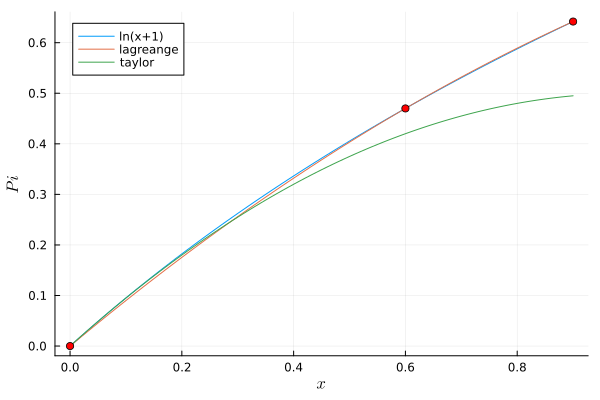

In [7]:
#primer grafico
plot(x0:0.01:x2,f,xlabel=L"x",ylabel=L"f(x)",label="ln(x+1)")
plot!(x0:0.01:x2,Pn,xlabel=L"x",ylabel=L"P(x)",label="lagreange")
plot!(x0:0.01:x2,t1,xlabel=L"x",ylabel=L"T(x)",label="taylor")
scatter!(vx,vy1, mc=:red, ylabel=L"Pi",label="")

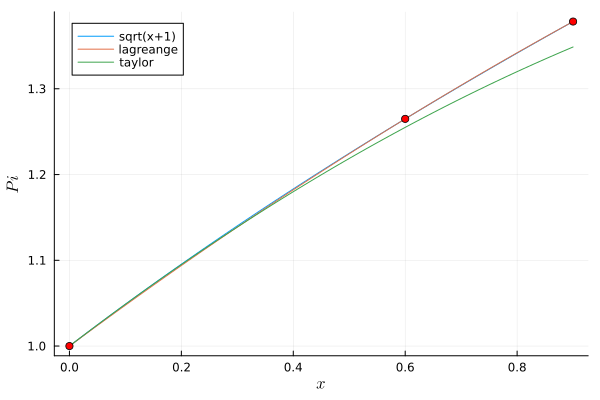

In [8]:
#2DO GRAFICO
plot(x0:0.01:x2,g,xlabel=L"x",ylabel=L"g(x)",label="sqrt(x+1)")
plot!(x0:0.01:x2,Pn2,xlabel=L"x",ylabel=L"P(x)",label="lagreange")
plot!(x0:0.01:x2,t2,xlabel=L"x",ylabel=L"T(x)",label="taylor")
scatter!(vx,vy2, mc=:red, ylabel=L"Pi",label="")

### Problema 2

1. Escriba una función que evalúe el **polinomio interpolante de Lagrange** $P$ en un punto $x$ con $x_0 < x < x_n$ siendo $(x_i,y_i)$ para $i=0,...,n$ los puntos a interpolar. La función debe tomar como argumentos de entrada: 

    1. el valor $x$, 
    2. un vector de valores $x_i$, 
    3. un vector  de valores $y_i$, y debe retornal el valor $P(x)$.

2. Para cada caso del **Problema 1**, realice un gráfico de $P(x)$ vs $x$ con una línea sólida generada con $N=200$ puntos equidistantes en el intérvalo $[x_0,x_n]$. Agrege a cada  gráfico la función interpolada utilizando una línea punteada sobre los mismos puntos, y los puntos de interpolación utilizando símbolos. **Ayuda:** no confundir los $N$ puntos usados para graficar las curvas, con los $n$ puntos interpolación $(x_i,y_i) = (x_i,f(x_i))$ con $i=0,1,2$ provistos en el **Problema 1**.

3. En otras figuras, gráfique la diferencia entre los polinomios y las funciones interpoladas.

In [9]:
#2.1
#una forma genértica :)
function productoria(puntos,i,x) #el polinomio en i
    prod=1
    for j in 1:length(puntos)
        if j==i
            #este valor se lo tiene que saltear
        else
            prod*=(x-puntos[j])/(puntos[i]-puntos[j])
        end
    end
    return prod #lo mando listo para usar
end
function lagrange(puntos,vecf,x)
    #vec_c=zeros(length(puntos))
    #vec_r=zeros(length(puntos))

    suma=0
    for i in 1:length(puntos) #hasta la cantidad de puntos cargados
        suma+=(vecf[i])*productoria(puntos,i,x)
    end
    return suma
end

lagrange (generic function with 1 method)

In [10]:
lagrange(vx,vy1,0.45) #si coincide :D  (solo pruebo con los valores del punto anterior)

0.36829061135835384

In [25]:
#2.2
#necesito generar 200 puntos equidistantes en el intervalo x0 xn
function generador_puntos(x0,xn;N=200)
    puntos=zeros(N) #vector para guardar los 200 puntos
    incremento=(xn-x0)/N #tamaño del intervalo en 200 pedacitos
    for i in 1:(N)
        puntos[i]=x0
        x0+=incremento
    end
    return puntos
end
#generador_puntos(1,5) (prueba de llamado a la funcion)
#necestio una funcion que me genere los puntos de f (la imagen de los x's)
function imagen(f,puntos) #pide una funcion y los puntos a evaluar
    puntosf=zeros(length(puntos)) #tiene mismo tamaño que el vect de puntos x's
    for i in 1:length(puntos) # de 1 hasta el ultimo punto x
        puntosf[i]=f(puntos[i])  #cargo el valor de la funcion evaluada ahí
    end
    return puntosf
end    

imagen (generic function with 1 method)

1×3 Matrix{Float64}:
 1.0  1.44914  1.3784

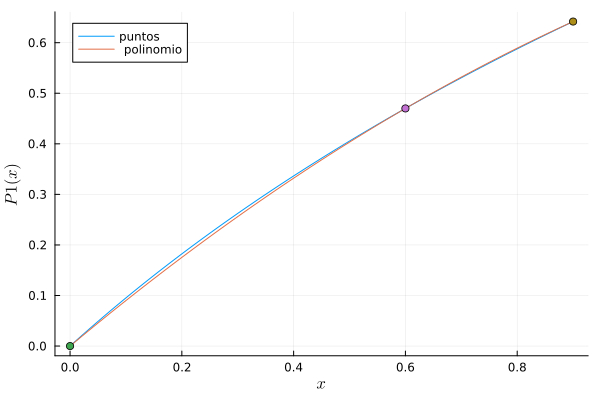

In [221]:
#las funciones eran:
f(x)=log(x+1)
g(x)=sqrt(x+1)
#ahora me encargo de crear los polinomios a graficar con esos nuevos puntos
x0=0
x1=0.6
x2=0.9
vx=[x0 x1 x2]
vy1=[f(x0) f(x1) f(x2)]
vy2=[g(x0) g(x1) g(x2)]
p=generador_puntos(x0,x2) #el vector con los 200 puntos

#imagenes
pi1=imagen(f,p)
pi2=imagen(g,p)
#creo los polinomios evaluados en un x=
p1(x)=lagrange(vx,vy1,x)
p2(x)=lagrange(vx,vy2,x)
#grafico lo de f(x)
plot(p,pi1,label="puntos") #grafico la linea hecha con los 200 puntos 
plot!(x0:0.01:x2,p1,xlabel=L"x",ylabel=L"P1(x)",label=" polinomio",ms=2) 
scatter!(vx,vy1,label="")
# grafico el polinomio de f no se ven todos porque solo avanza de a 0.01

In [ ]:
#p1(0.45)
#p2(0.45)

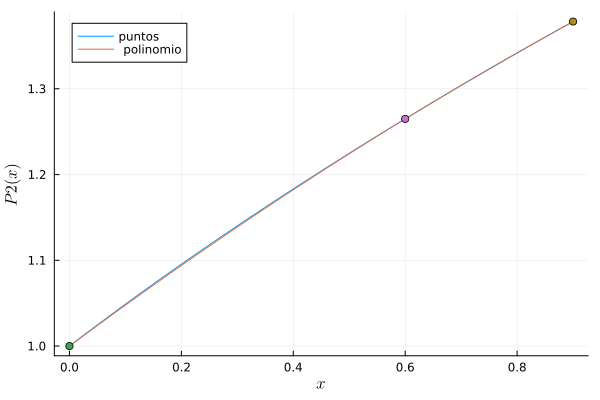

In [220]:
#grafico el otro acá g(x)
plot(p,imagen(g,p),label="puntos") #grafico la linea hecha con los 200 puntos 
plot!(x0:0.01:x2,p2,xlabel=L"x",ylabel=L"P2(x)",label=" polinomio",ms=2) 
scatter!(vx,vy2, label="")  #en el grafico salen los puntos con nombre, con label="" los borro

In [15]:
#2.3 
#para f(X):
d1(x)=abs(f(x)-p1(x))
d2(x)=abs(g(x)-p2(x))

d2 (generic function with 1 method)

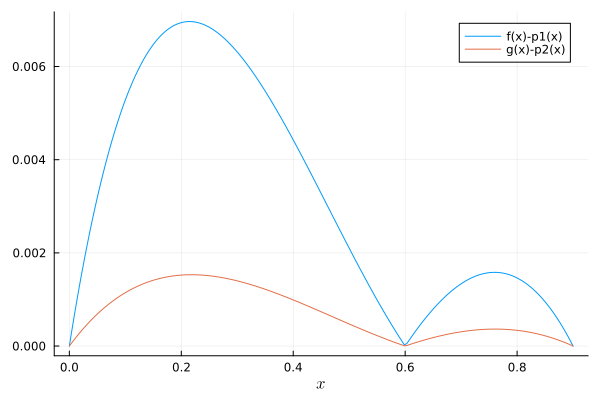

In [16]:
#grafico diferencia de f con su polinomio
plot(x0:0.0045:x2,d1,xlabel=L"x",label="f(x)-p1(x)")
#grafico diferencia de g con su polinomio
plot!(x0:0.0045:x2,d2,xlabel=L"x",label="g(x)-p2(x)") #mientras me alejo de los puntos mas error :D

### Problema 3

Construya analíticamente el polinomio interpolante de Newton para las siguientes funciones. 
De una cota del error absoluto en el intervalo $[x_0,x_n]$.

1. La función
     $$f(x) = \exp (2x) \cos(3x)$$
   para $x_0=0$, $x_1=0.3$ y $x_2=0.6$.

2. La función 
    $$g(x) = \ln(x)$$
   para $x_0=1$, $x_1=1.1$, $x_2=1.3$ y $x_3=1.4$.

In [114]:
#1, en [0,0.6]
f_2(x)=exp(2x)*cos(3x)
x0=0
x1=0.3
x2=0.6
f0=f_2(x0)
f1=f_2(x1)
f2=f_2(x2)
P1(x)=f0+((f1-f0)/(x1-x0))*(x-x0)+((((f2-f1)/(x2-x1))-((f1-f0)/(x1-x0)))/(x1-x0))*(x-x0)*(x-x1)

P1 (generic function with 1 method)

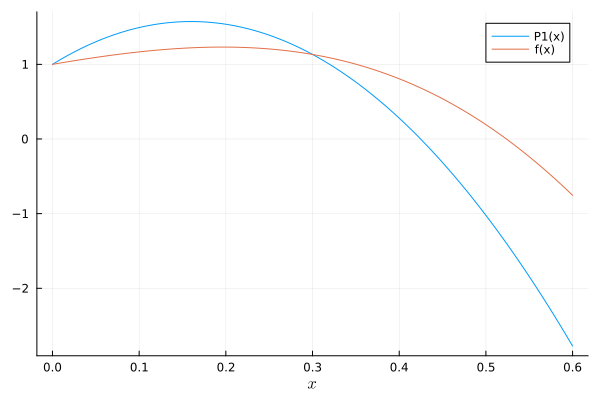

In [115]:
#grafico los ploinomios porque si
plot(x0:0.001:x2,P1,xlabel=L"x",label="P1(x)")
plot!(x0:0.001:x2,f_2,xlabel=L"x",label="f(x)")

In [116]:
#1, en [0,0.6]
g_2(x)=log(x)
x0=1
x1=1.1
x2=1.3
x3=1.4
g0=g_2(x0)
g1=g_2(x1)
g2=g_2(x2)
####REACER TODO ESTO CON EL METODO DE FABRITZIO
P2(x)=g0+ ((g1-g0)/(x1-x0))*(x-x0) + ((((g2-g1)/(x2-x1))-((g1-g0)/(x1-x0)))/(x1-x0))*(x-x0)*(x-x1) + (()/(x3-x0))*(x-x0)*(x-x1)*(x-x2)


P2 (generic function with 1 method)

In [117]:
#grafico los ploinomios porque si
#plot(x0:0.001:x2,P2,xlabel=L"x",label="P2(x)")
#plot!(x0:0.001:x3,g,xlabel=L"x",label="g(x)")

### Problema 4

1. Escriba una función que evalúe el **polinomio interpolante de Netwon** $P$ en un punto $x$ con $x_0 < x < x_n$ siendo $(x_i,y_i)$ para $i=0,...,n$ los puntos a interpolar. La función debe tomar como argumentos de entrada:
    1. el valor $x$, 
    2. un arreglo $v$ de valores $x_i$,
    3. un arreglo $w$ de valores $y_i$, y debe retornal el valor $P(x)$.

2. Grafique los polinomios interpolantes de Newton para las funciones del **problema 3** en $N=200$ puntos equidistantes en el intervalo $[x_0,x_n]$ correspondiente. Incluya en el grafico las curvas de las funciones y, con símbolos, los puntos de interpolación.

3. Repita los incisos 1. y 2. pero usando puntos de interpolación determinados por $n=80$ valores equidistantes de $x_i$ en $[0,0.6]$ para $f$ y en $[1,1.4]$ para $g$.

4. Repita el inciso 3. pero usando `BigFloat` en vez de `Float64`.

5. Interprete lo observado.

In [208]:
#iba a hacer mi version, pero ye tengo lo que hizo el profe :\
function pol_interpoplante_newton(x,puntosx,puntosf)
    n=length(puntos) #quiero saber cuantos terminos tendrá el polinomio
    vec_terminos=zeros(n)
    
    for i in 1:n
        #      
        
    end

end

pol_interpoplante_newton (generic function with 1 method)

In [124]:
#metodo del profe
#4.1
function P(x,v,w) #polinomio interpolante de Newton
    @assert length(v)==length(w)
    n=length(v)
    z = deepcopy(w)
    for i=2:n
        for j=n:-1:i
            z[j]=(z[j]-z[j-1])/(v[j]-v[j-i+1])
        end
    end
    r=z[n]
    for i=n-1:-1:1
        r=z[i]+(x-v[i])*r
    end
    return r
end


P (generic function with 1 method)

In [154]:
#4.2
f(x)=exp(2x)*cos(3x)
g(x)=log(x)
#voy a usar mi funcion para generar puntos equidistantes
pparaf=generador_puntos(0,0.6)
pparag=generador_puntos(1,1.4)
imagenf=imagen(f_2,pparaf)
imageng=imagen(g_2,pparag)
Pf(x)=P(x,pparaf,imagenf)#creo los polinomios con los puntos recien creados
Pg(x)=P(x,pparag,imageng)

Pg (generic function with 1 method)

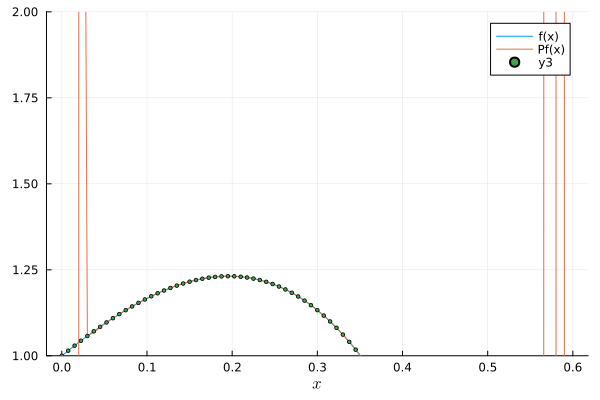

In [193]:
#grafico del polinomio de f
plot(0:0.001:0.6,f,xlabel=L"x",label="f(x)")
plot!(0:0.01:0.6,Pf,xlabel=L"x",label="Pf(x)")
scatter!(pparaf,imagenf,ms=2)
ylims!(1, 1) #no se para que es pero ayuda

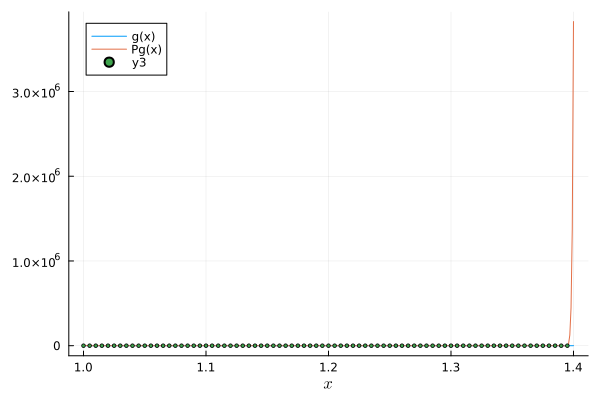

In [194]:
#grafico de g y pol de g
plot(1:0.001:1.4,g,xlabel=L"x",label="g(x)")
plot!(1:0.001:1.4,Pg,xlabel=L"x",label="Pg(x)")
scatter!(pparag,imageng,ms=2)

In [195]:
#4.3
#voy a usar mi funcion para generar puntos equidistantes
pparaf=generador_puntos(0,0.6;N=80) #cuando no escribo N=algo, toma por defecto N=200, porq asi lo definí
pparag=generador_puntos(1,1.4;N=80)
imagenf=imagen(f,pparaf)
imageng=imagen(g,pparag)
Pf2(x)=P(x,pparaf,imagenf)#creo los polinomios con los puntos recien creados
Pg2(x)=P(x,pparag,imageng)

Pg2 (generic function with 1 method)

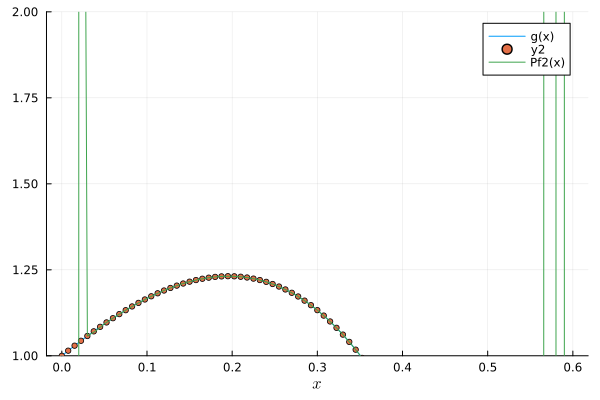

In [206]:
#grafico del polinomio de f
plot(0:0.01:0.6,f,xlabel=L"x",label="g(x)")
scatter!(pparaf,imagenf, ms=3)
plot!(0:0.01:0.6,Pf2,xlabel=L"x",label="Pf2(x)")
ylims!(1, 1) #aqui ayuda

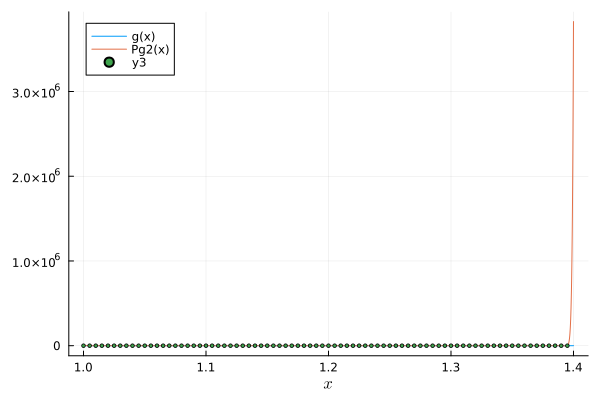

In [207]:
#grafico del polinomio de f
plot(1:0.0001:1.4,g,xlabel=L"x",label="g(x)")
plot!(1:0.0001:1.4,Pg2,xlabel=L"x",label="Pg2(x)")
scatter!(pparag,imageng, ms=2)
#ylims!(1, 1) #en este caso no ayuda

In [100]:
#falta hacer 4.4

### Problema 5 

#### Error  de la interpolación polinomial para puntos equiespaciados

Usando el teorema dado en el teórico, demuestre el siguiente corolario.

**Corolario:** Sea $f \in C_{[a,b]}^{(n+1)}$  tal que $\exists M>0 / |f^{(n+1)}(x) |< M \;\forall \,x\in [a,b]$ (i.e. su $n+1$-ésima derivada es acotada en $[a,b]$). Sea $x_i=a + ih \;; i=0,\cdots,n$ donde $ h=(b-a)/n$. Sea $P_n$ es el polinomio de grado $n$ interpolante a $f$ en los puntos $x_i$ (i.e. $P_n(x_i)=f(x_i)\;,i=0,\cdots ,n$). Entonces, $\forall\;x\in [a,b]$ se tiene
$$
\left| f(x) - P_n(x)\right | \leq \frac{M}{4 (n+1)}\;\left(\frac{b-a}{n}\right)^{n+1}
$$

### Problema 6

Se desea aproximar $\cos(x)$ en el intervalo $[0,1]$ con un error absoluto menor a $1\times 10^{-7}$ para todo $x \in [0,1]$. 

1. Usando el teorema del error de la interpolación polinomial, estime el número $n$ de puntos de interpolación que son necesarios para conseguir el máximo error absoluto mencionado.

2. Grafique el error absoluto en el intervalo en cuestión para tres casos particulares de $\{x_i\}$: 
    1. puntos equidistantes $x_i=i/n$, 
    2. $n$ puntos distribuidos al azar en el intervalo $[0,1]$, y 
    3. puntos distribuidos heterogéneamente según la fórmula $x_i=1/i$ para $i=1,2,...,n$.

## Ejercicios Complementarios

### Problema C.1

Considere la función definida por $f(x) = \frac{1}{1 + 25 x^2}$.

1. Grafique la función $f$ en el intervalo $[-1,1]$.

Luego, para cada valor de $n\in \{5, 10, 20\}$:

2. Calcule la interpolación de $f$ por el **método de Lagrange** usando $n+1$ valores equidistantes de $x$ en el intervalo mencionado.

3. Añada al gráfico una curva del polinomio interpolante evaluandolo en 200 puntos equidistantes en los rangos $x=[-1,1]$ e $y=[-1.5,1.5]$.

4. Calcule el error máximo para cada caso e incluya estos datos de errores máximos en el gráfico.

**Nota:** En este problema se observa el llamado *fenómeno de Runge*, en el que la interpolación por polinomios usando puntos equiespaciados da resultados divergentes.

5. ¿Por qué no hay contradicción con el teorema de aproximación de Weierstrass?

6. En vez de puntos equiespaciados, pruebe usando el espaciamiento de Chebyshev dado por $x_i = -\cos(\pi (i-1)/n)$, para $i=1,2,...,n+1$. ¿Disminuye significativamente el error en este caso?

### Problema C.2

Considere el siguiente polinomio:
$$
p(x) = -10 + 5 x - 12 x^2  + 6 x^3  - 2 x^4  + x^5 \ ,
$$

1. Grafíquelo y observe que posee una única raíz real positiva.

2. Calcule a mano su derivada y grafíquela.

3. Evalúe el polinomio y su derivada utilizando el algoritmo de Horner de la guía 2. Grafique nuevamente comparando con lo graficado en los incisos 2. y 3. para verificar que dan lo mismo.

4. Encuentre la raíz del polinomo utilizando el método de Newton-Raphson. Para ello, elija el valor inicial $p_1$ sacando ventaja de los teoremas que acotan la región del espacio complejo donde se encuentran las raíces.

In [44]:
#una forma genértica :)
function productoria(puntos,i,x) #el polinomio en i
    prod=1
    for j in 1:length(puntos)
        if j==i
            #este valor se lo tiene que saltear
        else
            prod*=(x-puntos[j])/(puntos[i]-puntos[j])
        end
    end
    return prod #lo mando listo para usar
end
function lagrange(puntos,vecf,x)
    vec_c=zeros(length(puntos))
    vec_r=zeros(length(puntos))

    suma=0
    for i in 1:length(puntos) #hasta la cantidad de puntos cargados
        suma+=(vecf[i])*productoria(puntos,i,x)
    end
    return suma
end


lagrange (generic function with 1 method)

In [45]:
lagrange(vx,vy1,0.45) #si coincide :D

0.36829061135835384